In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv('data/merged_climate_iom_data.csv')

In [3]:
# Impute mean of group 'country_name' to numerical values with NA

df['Total Affected'] = df.groupby(['country_name', 'year'])['Total Affected'].transform(lambda x: x.fillna(x.median()))
df['internally_displaced_persons'] = df.groupby(['country_name', 'year'])['internally_displaced_persons'].transform(lambda x: x.fillna(x.median()))

c:\Users\LENOVO\anaconda3\envs\hertie_climate_migration\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


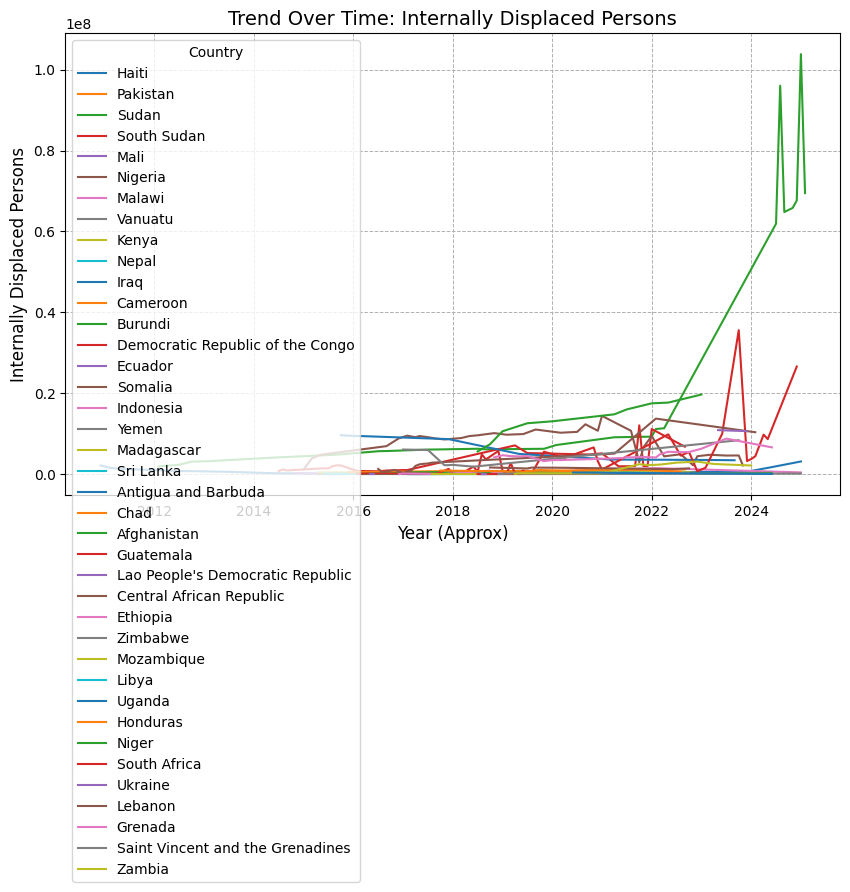

In [4]:
# Group data by country and plot trends over time
plt.figure(figsize=(10, 6))
for country in df["country_name"].unique():
    country_data = df[df["country_name"] == country]
    plt.plot(country_data["year"] + country_data["month"] / 12,  # Approximate time axis (year + fractional month)
             country_data["internally_displaced_persons"],
             label=country)

# Add labels, title, and legend
plt.title("Trend Over Time: Internally Displaced Persons", fontsize=14)
plt.xlabel("Year (Approx)", fontsize=12)
plt.ylabel("Internally Displaced Persons", fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.7)
plt.legend(title="Country", loc="best")
plt.show()

In [5]:
grouped_per_year_data = df.groupby(['year', 'month']).agg({'Total Affected': 'mean', 'internally_displaced_persons': 'mean'}).reset_index()

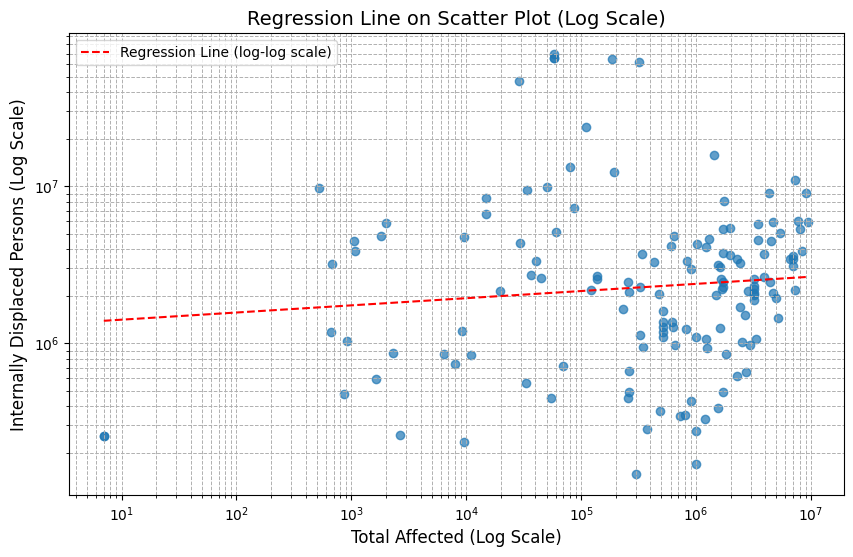

In [6]:
# Extract columns for regression
x = grouped_per_year_data["Total Affected"].values
y = grouped_per_year_data["internally_displaced_persons"].values

# Compute line of best fit using numpy's polyfit. Log transformation for x and y.
log_x = np.log10(x)
log_y = np.log10(y)
m, b = np.polyfit(log_x, log_y, 1)  # `m` is slope, `b` is intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label='')

# Generate regression line: calculate y_hat based on log-transformed x
x_fit = np.linspace(min(x), max(x), 100)
y_fit = 10**(m * np.log10(x_fit) + b)  # Transform back to original scale
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=f"Regression Line (log-log scale)")

# Set log scale for axes
plt.xscale("log")
plt.yscale("log")

# Add labels, title, legend and grid
plt.title("Regression Line on Scatter Plot (Log Scale)", fontsize=14)
plt.xlabel("Total Affected (Log Scale)", fontsize=12)
plt.ylabel("Internally Displaced Persons (Log Scale)", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.legend()
plt.show()
